# Importing Libraries

In [157]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import plotly.graph_objects as go
from statsmodels.tsa.arima_model import ARIMA
from random import random

In [159]:
confirmed_df = pd.read_csv('dataset_final.csv')
confirmed_df.head()

confirmed_df = confirmed_df.groupby("Province/State").sum().reset_index()
print("DONE 1")
Country_confirmed =  confirmed_df["Province/State"].values
print("DONE 2")
confirmed_df = confirmed_df.drop(['Province/State'], axis=1)
print("DONE 3")
confirmed_df = confirmed_df[confirmed_df.columns].T
print("DONE 4")
confirmed_df.columns = Country_confirmed
print("DONE 5")
Date_index = confirmed_df.index
print("DONE 6")
confirmed_df = confirmed_df.diff().fillna(0)
print("DONE 7")
confirmed_df = confirmed_df.abs()
print("DONE 8")
confirmed_df.head()


DONE 1
DONE 2
DONE 3
DONE 4
DONE 5
DONE 6
DONE 7
DONE 8


,AB,AG,AR,B,BC,BH,BN,BR,BT,BV,...,SB,SJ,SM,SV,TL,TM,TR,VL,VN,VS
04/03/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04/04/2020,2.0,2.0,18.0,6.0,3.0,2.0,1.0,2.0,4.0,3.0,...,0.0,2.0,1.0,101.0,0.0,10.0,3.0,1.0,0.0,0.0
04/05/2020,18.0,11.0,22.0,2.0,11.0,0.0,14.0,0.0,20.0,4.0,...,22.0,3.0,6.0,248.0,0.0,40.0,0.0,1.0,9.0,2.0
04/06/2020,1.0,2.0,7.0,14.0,1.0,6.0,16.0,0.0,16.0,7.0,...,6.0,2.0,4.0,13.0,0.0,5.0,9.0,0.0,0.0,1.0
04/07/2020,16.0,4.0,4.0,32.0,8.0,3.0,12.0,1.0,2.0,18.0,...,14.0,1.0,2.0,94.0,0.0,10.0,1.0,1.0,0.0,1.0


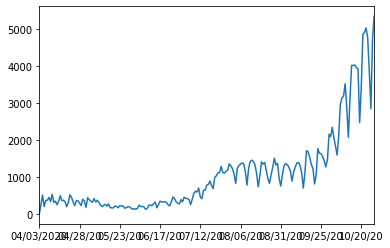

In [160]:
covid_cases = confirmed_df.sum(axis=1)
covid_cases.plot()

In [169]:
ratio_B = confirmed_df["BR"]/covid_cases*100


04/03/2020         NaN
04/04/2020    0.790514
04/05/2020    0.000000
04/06/2020    0.000000
04/07/2020    0.276243
                ...   
10/24/20      0.630120
10/25/20      0.648508
10/26/20      0.843882
10/27/20      0.656224
10/28/20      0.542868
Length: 209, dtype: float64

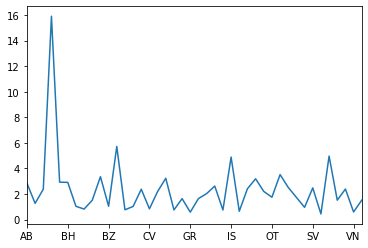

In [162]:
ratio_counties_avg = confirmed_df[-14:].transform(lambda row: 100 * row / row.sum(), axis=1).mean()
ratio_counties_avg.plot()

# Scalling the data

In [119]:
covid_cases

04/03/2020       0.0
04/04/2020     253.0
04/05/2020     510.0
04/06/2020     197.0
04/07/2020     362.0
               ...  
10/24/20      4761.0
10/25/20      3855.0
10/26/20      2844.0
10/27/20      4724.0
10/28/20      5342.0
Length: 209, dtype: float64

In [146]:
!pip install statsmodels==0.11.1

     |████████████████████████████████| 8.4MB 1.4MB/s 
  Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodels-0.11.0:
      Successfully uninstalled statsmodels-0.11.0


In [163]:
!pip show statsmodels

Name: statsmodels
Version: 0.11.1
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /Users/emilie_jeweetzelf/opt/anaconda3/lib/python3.7/site-packages
Requires: numpy, scipy, patsy, pandas
Required-by: 


In [164]:
# fit model
model = ARIMA(covid_cases.values, order=(2, 0, 2))
model_fit = model.fit(disp=False)
# make prediction



[4561.06238625 4456.79711551 4448.15505717 4443.09012802 4438.16873367
 4433.26277007 4428.36743713 4423.48253439]


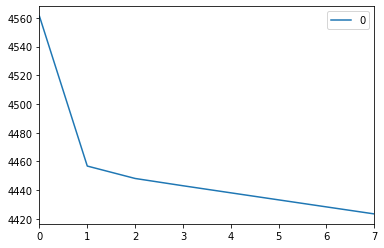

In [165]:
yhat = model_fit.predict(209, 216)
pd.(yhat).plot()
print(yhat)

In [166]:
prediciton = yhat

In [167]:
ratio_counties_avg

AB     2.848654
AG     1.270436
AR     2.378055
B     15.906584
BC     2.928407
BH     2.912209
BN     1.039490
BR     0.825975
BT     1.518852
BV     3.356459
BZ     1.045275
CJ     5.721886
CL     0.768752
CS     1.027698
CT     2.378197
CV     0.842985
DB     2.195041
DJ     3.234926
GJ     0.758184
GL     1.642391
GR     0.582155
HD     1.645108
HR     2.031025
IF     2.622706
IL     0.751448
IS     4.891809
MH     0.652249
MM     2.414405
MS     3.193490
NT     2.204864
OT     1.751411
PH     3.519590
SB     2.517236
SJ     1.735362
SM     0.960118
SV     2.480556
TL     0.445096
TM     4.968670
TR     1.521318
VL     2.390813
VN     0.598021
VS     1.522095
dtype: float64

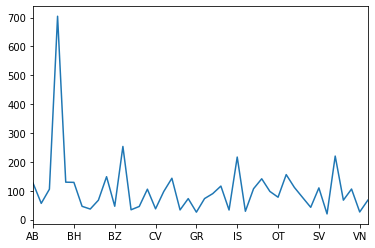

In [172]:
counties_prediction = ratio_counties_avg*prediciton[6]/100
counties_prediction.plot()